# Importaciones

In [3]:
import mne
import yasa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sovaflow.utils import createRaw
from sovareject.tools import format_data


# 1 SUJET0

In [2]:
path_prep='F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-prep_eeg.fif'
path_wica='F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-wica_eeg.fif'
path_reject='F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-reject[restCE]_eeg.fif'

Read signals prep and wica

In [3]:
signal_prep = mne.io.read_raw(path_prep)
signal_wica = mne.io.read_raw(path_wica)

Opening raw data file F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-prep_eeg.fif...
    Range : 0 ... 305079 =      0.000 ...   305.079 secs
Ready.
Opening raw data file F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-wica_eeg.fif...
Isotrak not found
    Range : 0 ... 304999 =      0.000 ...   304.999 secs
Ready.


Read signal reject

In [19]:
raw=mne.read_epochs(path_reject, preload=True, verbose=0)
signalc=raw.copy()
(e, c, t) = signalc._data.shape
signal_data = signalc.get_data()
da_eeg_cont = np.concatenate(signal_data,axis=-1)
for e in range(signal_data.shape[0]):
    for c in range(signal_data.shape[1]):
        assert np.all(signal_data[e,c,:] == da_eeg_cont[c,e*t:(e+1)*t])
signal_reject = createRaw(da_eeg_cont,signalc.info['sfreq'],ch_names=signalc.info['ch_names'])

C:\Users\Luisa\AppData\Local\Temp\ipykernel_14960\1006504666.py:1: RuntimeWarning: This filename (F:\BIOMARCADORES\derivatives\sovaharmony\sub-CTR001\ses-V0\eeg\sub-CTR001_ses-V0_task-CE_desc-reject[restCE]_eeg.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  raw=mne.read_epochs(path_reject, preload=True, verbose=0)


Reducción de canales

In [20]:
channels_reduction={'cresta':['F3','F4','C3','C4','P3','P4','O1','O2'],
                    'openBCI':['FP1','FP2','C3','C4','P7','P8','O2','O1'],# #https://docs.openbci.com/Deprecated/UltracortexMark3_NovaDep/
                    'paper':['F3','F4','C3','C4','TP7','TP8','O1','O2'] # En el paper esta T3 y T4, lo cambiamos por TP7 y TP8
                    # Quantitative electroencephalography in mild cognitive impairment: longitdinal changes and possible prediction of ALzheimer's disease
                    }
montage_select='openBCI'
intersection_chs =list(set(channels_reduction[montage_select]).intersection(signal_reject.ch_names))
signalc.reorder_channels(intersection_chs)
signal_prep.reorder_channels(intersection_chs)
signal_wica.reorder_channels(intersection_chs)
signal_reject.reorder_channels(intersection_chs)

<RawArray | 8 x 240000 (240.0 s), ~14.7 MB, data loaded>

In [21]:
ep_prep,time=format_data(signal_prep.get_data(), signal_prep.info['sfreq'], 5)
ep_wica,time=format_data(signal_wica.get_data(), signal_wica.info['sfreq'], 5)

In [24]:
signalc.get_data().shape

(48, 8, 5000)

In [26]:
psd,f=mne.time_frequency.psd_array_multitaper(signalc.get_data(), sfreq= signal_reject.info['sfreq'], fmin=1, fmax =50)

    Using multitaper spectrum estimation with 7 DPSS windows


In [31]:
psd.mean(axis=0).shape


array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
        3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
        5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
        7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
        9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8,
       12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
       14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2,
       16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4,
       18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. , 20.2, 20.4, 20.6,
       20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. , 22.2, 22.4, 22.6, 22.8,
       23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2, 24.4, 24.6, 24.8, 25. ,
       25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4, 26.6, 26.8, 27. , 27.2,
       27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6, 28.8, 29. , 29.2, 29.4,
       29.6, 29.8, 30. , 30.2, 30.4, 30.6, 30.8, 31

In [39]:
ss_reject.shape

(4097,)

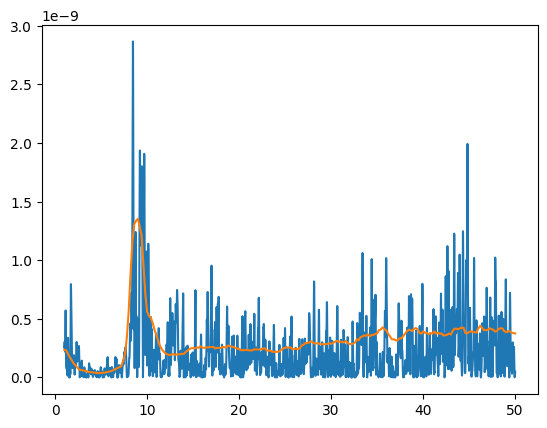

In [45]:

plt.plot(freqs_reject, psd_reject[7, :]) # multitaper mne continua
plt.plot(f,psd.mean(axis=0)[7]) # multitaper mne epocas

(0.0, 50.0)

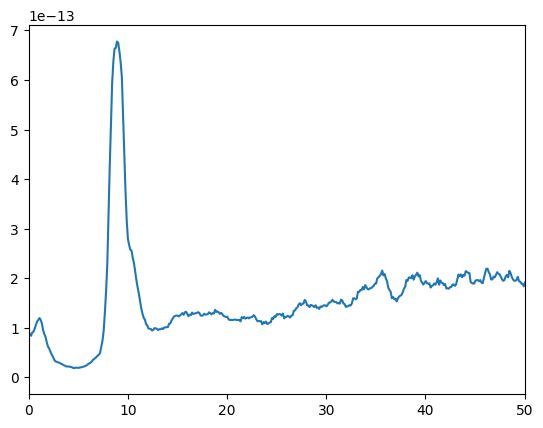

In [44]:
plt.plot(ffo_reject, ss_reject) # multitaper chorux continua
plt.xlim(0,50)

In [7]:
psd_prep, freqs_prep = mne.time_frequency.psd_array_multitaper(signal_prep.get_data(), sfreq= signal_prep.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data
psd_wica, freqs_wica = mne.time_frequency.psd_array_multitaper(signal_wica.get_data(), sfreq= signal_wica.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data
psd_reject, freqs_reject = mne.time_frequency.psd_array_multitaper(signal_reject.get_data(), sfreq= signal_reject.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data

    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Luisa\AppData\Local\Temp\ipykernel_14960\2331262530.py:1: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd_prep, freqs_prep = mne.time_frequency.psd_array_multitaper(signal_prep.get_data(), sfreq= signal_prep.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Luisa\AppData\Local\Temp\ipykernel_14960\2331262530.py:2: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd_wica, freqs_wica = mne.time_frequency.psd_array_multitaper(signal_wica.get_data(), sfreq= signal_wica.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Luisa\AppData\Local\Temp\ipykernel_14960\2331262530.py:3: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd_reject, freqs_reject = mne.time_frequency.psd_array_multitaper(signal_reject.get_data(), sfreq= signal_reject.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data


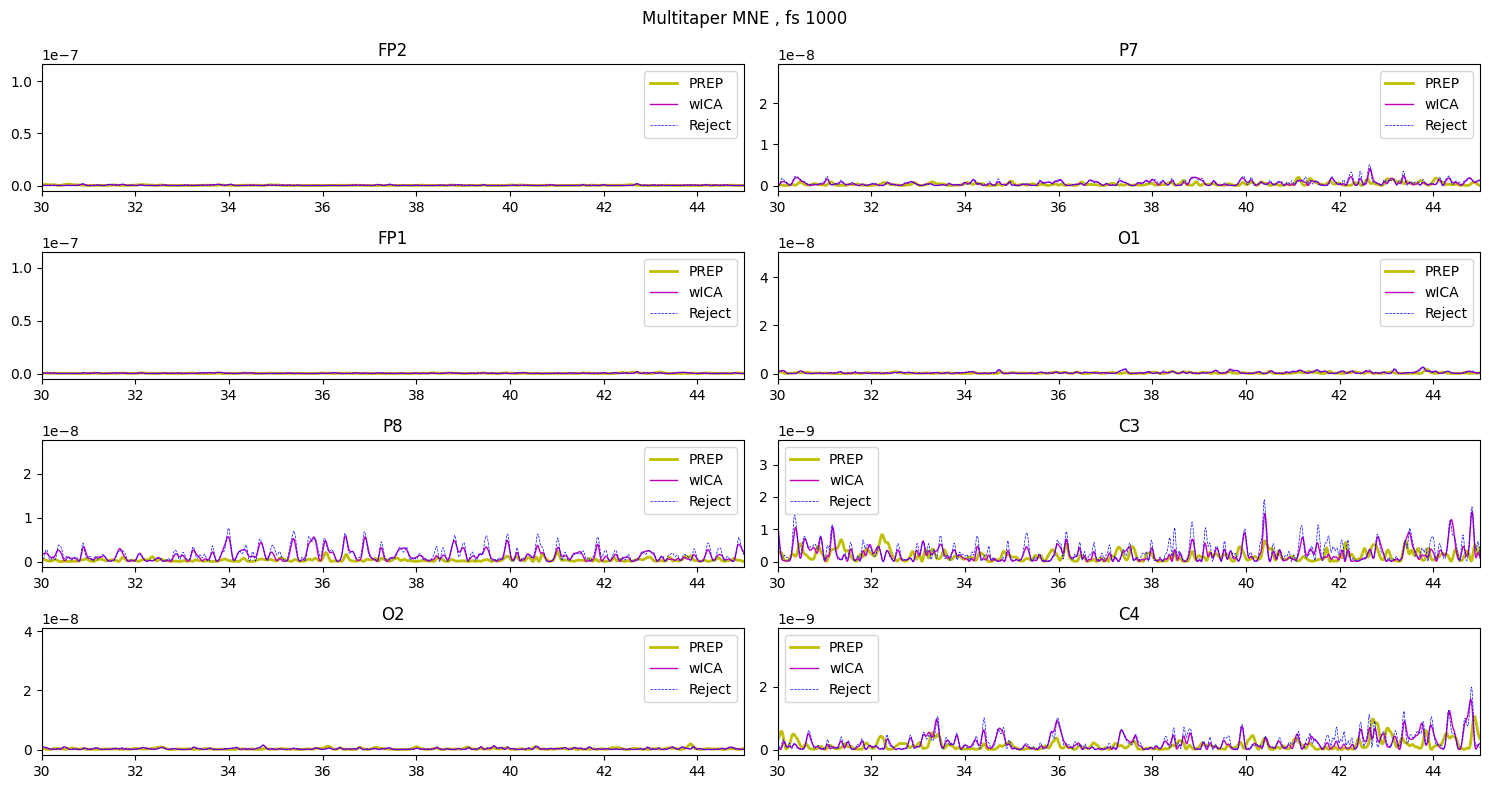

In [18]:
import seaborn as sns

num_channels = len(signal_reject.info['ch_names'])
num_rows = (num_channels + 1) // 2  # División entera redondeada hacia arriba

# Crea una figura con dos columnas de subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
x_line = [6, 8.5, 10.5, 12.5, 18.5, 21, 30]

# Ajusta los subplots
for i, ch in enumerate(signal_reject.info['ch_names']):
    row = i // 2  # Determina la fila del subplot
    col = i % 2   # Determina la columna del subplot
    axs[row, col].plot(freqs_prep, psd_prep[i, :], lw=2, label='PREP',color='y')
    axs[row, col].plot(freqs_wica, psd_wica[i, :], lw=1, label='wICA',color='m')
    axs[row, col].plot(freqs_reject, psd_reject[i, :], lw=0.5, label='Reject',color='b', linestyle='--')
    
    axs[row, col].set_xlim(30, 45)
    axs[row, col].legend()
    axs[row, col].set_title(ch)
    for x in x_line:
        axs[row, col].axvline(x=x, color='gray', linestyle='--')

# Ajusta el espaciado entre subplots
plt.suptitle('Multitaper MNE , fs 1000')
plt.tight_layout()
plt.show()


In [13]:
from sovachronux.qeeg_psd_chronux import qeeg_psd_chronux

bands ={'Delta':(1.5,6),
        'Theta':(6,8.5),
        'Alpha-1':(8.5,10.5),
        'Alpha-2':(10.5,12.5),
        'Beta1':(12.5,18.5),
        'Beta2':(18.5,21),
        'Beta3':(21,30),
        'Gamma':(30,45)
        }
x_line=[6,8.5,10.5,12.5,18.5,21,30,45]

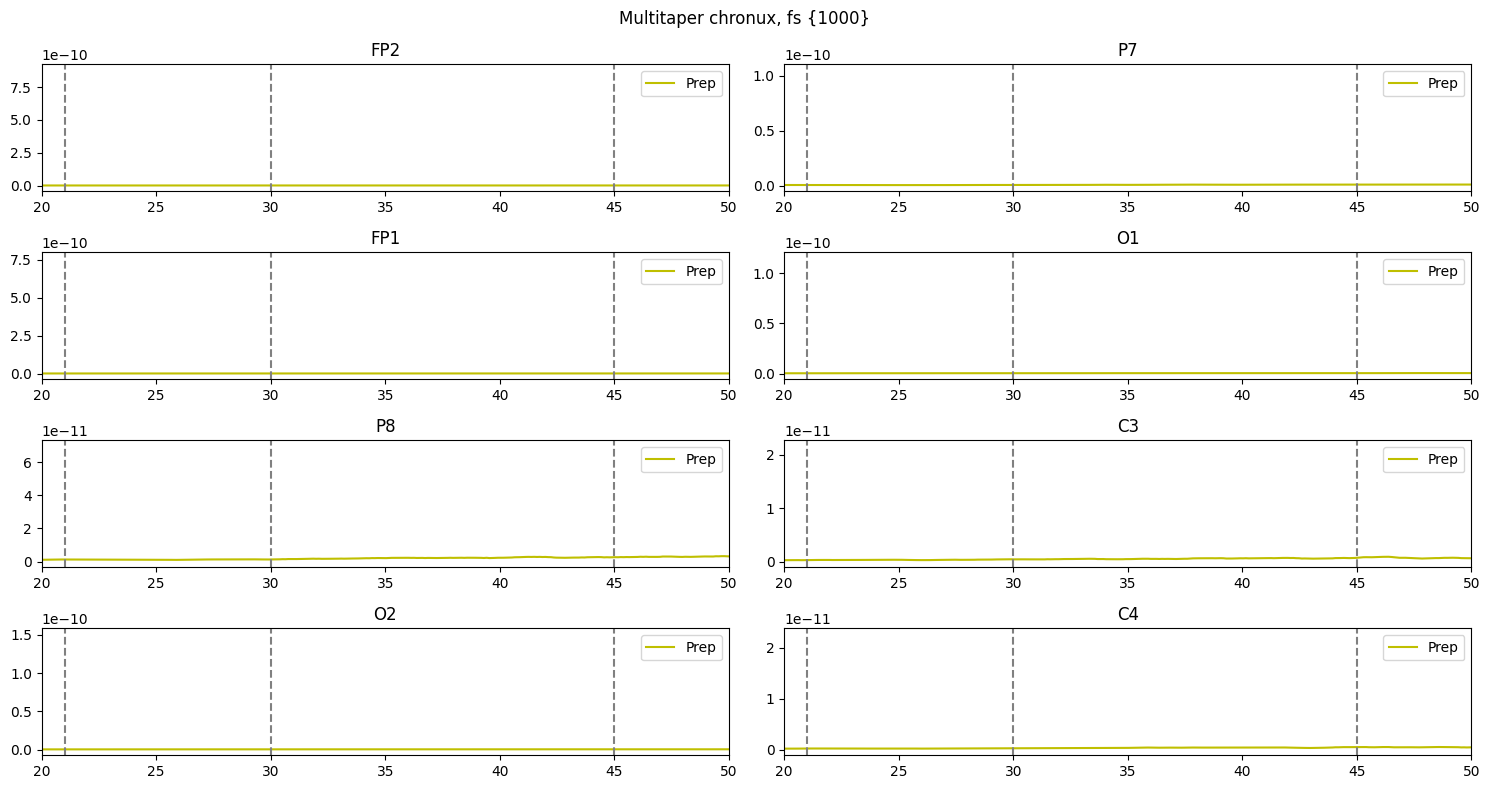

In [15]:

num_channels = len(signal_prep.info['ch_names'])
num_rows = (num_channels + 1) // 2  # División entera redondeada hacia arriba

# Crea una figura con dos columnas de subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
space_names = signal_prep.info['ch_names']

# Inicializa un contador para el índice de fila
row_index = 0

for space in space_names:
    sreject = np.transpose(signalc.get_data(), (1, 2, 0))
    
    space_idx = space_names.index(space)
    ss_prep, ffo_prep, power_normalized_prep = qeeg_psd_chronux(ep_prep[space_idx,:,:], signal_prep.info['sfreq'], bands, spectro=True)
    ss_wica, ffo_wica, power_normalized_wica = qeeg_psd_chronux(ep_wica[space_idx,:,:], signal_wica.info['sfreq'], bands, spectro=True)
    ss_reject, ffo_reject, power_normalized_reject = qeeg_psd_chronux(sreject[space_idx,:,:], signal_reject.info['sfreq'], bands, spectro=True) 

    # Determina la fila y columna del subplot
    row = row_index // 2  # Determina la fila del subplot
    col = row_index % 2   # Determina la columna del subplot
    
    axs[row, col].plot(ffo_prep, ss_prep, label='Prep',color='y')
    #axs[row, col].plot(ffo_wica, ss_wica, label='wICA',color='m')
    #axs[row, col].plot(ffo_reject, ss_reject, label='Reject',color='b', linestyle='--')
    axs[row, col].set_xlim(20, 50)
    axs[row, col].legend()
    axs[row, col].set_title(space)  # Utiliza 'space' en lugar de 'ch' para el título
    
    # Incrementa el índice de fila
    row_index += 1
    for x in x_line:
        axs[row, col].axvline(x=x, color='gray', linestyle='--')


# Añade el título y ajusta el espaciado entre subplots
plt.suptitle('Multitaper chronux, fs {1000}')
plt.tight_layout()
plt.show()


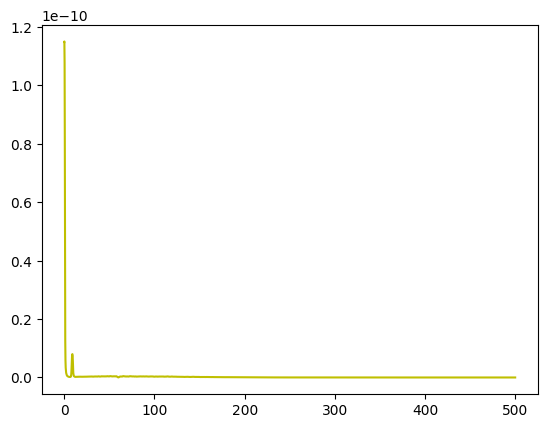

In [12]:
plt.plot(ffo_prep, ss_prep, label='Prep',color='y')

## Sampling 250 hz

In [13]:
signal_prep.info['sfreq']/4 

250.0

In [14]:
#prep
signal_pre_resampled = signal_prep.copy().resample(sfreq=signal_prep.info['sfreq']/4 , npad='auto')
info_pre_resampled = signal_pre_resampled.info
#wica
signal_wica_resampled = signal_wica.copy().resample(sfreq=signal_wica.info['sfreq']/4 , npad='auto')
info_wica_resampled = signal_wica_resampled.info

prep_resampled = mne.io.RawArray(signal_pre_resampled.get_data(), info_pre_resampled)
wica_resampled = mne.io.RawArray(signal_wica_resampled.get_data(), info_wica_resampled)

#reject
subsampled_epochs_data = signalc.resample(sfreq=signalc.info['sfreq']/4 , npad='auto')
subsampled_epochs = mne.EpochsArray(subsampled_epochs_data, signalc.info, tmin=signalc.tmin)

(e, c, t) = subsampled_epochs._data.shape
signal_data = subsampled_epochs.get_data()
da_eeg_cont = np.concatenate(signal_data,axis=-1)
for e in range(signal_data.shape[0]):
    for c in range(signal_data.shape[1]):
        assert np.all(signal_data[e,c,:] == da_eeg_cont[c,e*t:(e+1)*t])
reject_resampled = createRaw(da_eeg_cont,subsampled_epochs.info['sfreq'],ch_names=signalc.info['ch_names'])


#signal_wica

rep_prep,time=format_data(prep_resampled.get_data(), prep_resampled.info['sfreq'], 5)
rep_wica,time=format_data(wica_resampled.get_data(), wica_resampled.info['sfreq'], 5)

Creating RawArray with float64 data, n_channels=8, n_times=76270
    Range : 0 ... 76269 =      0.000 ...   305.076 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=76250
    Range : 0 ... 76249 =      0.000 ...   304.996 secs
Ready.
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


In [15]:
print('reject continua:         ',signal_prep.get_data().shape)
print('reject continua resample:',prep_resampled.get_data().shape)
print('reject epocas:           ' ,ep_prep.shape)
print('reject epocas resample:  ',rep_prep.shape)

reject continua:          (8, 305080)
reject continua resample: (8, 76270)
reject epocas:            (8, 5000, 61)
reject epocas resample:   (8, 1250, 61)


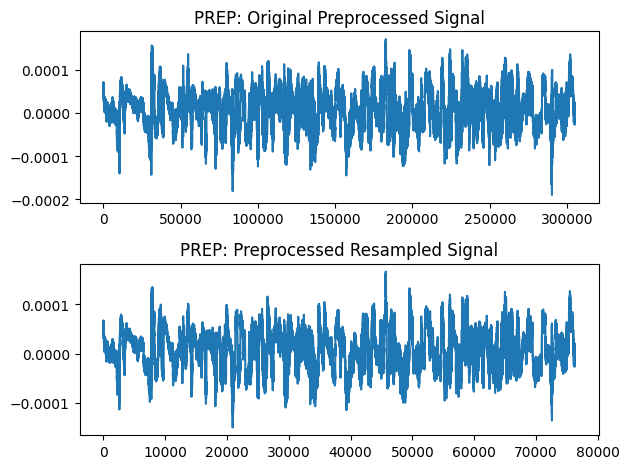

In [16]:
import matplotlib.pyplot as plt

# Crea la primera subtrama y traza la señal submuestreada
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primera subtrama
plt.plot(signal_prep.get_data()[0])  # Trama la primera señal original

plt.title('PREP: Original Preprocessed Signal')


# Crea la segunda subtrama y traza la señal original
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segunda subtrama
plt.plot(prep_resampled.get_data()[0])  # Trama la primera señal submuestreada

plt.title('PREP: Preprocessed Resampled Signal')

# Muestra las subtramas
plt.tight_layout()
plt.show()

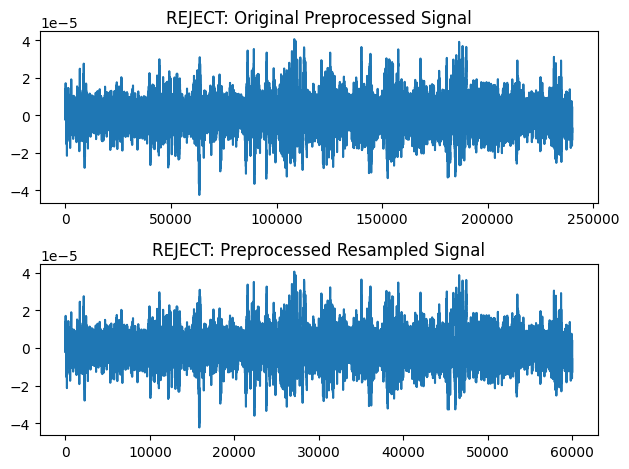

In [25]:
import matplotlib.pyplot as plt

# Crea la primera subtrama y traza la señal submuestreada
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primera subtrama
plt.plot(signal_reject.get_data()[0])  # Trama la primera señal original
plt.title('REJECT: Original Preprocessed Signal')


# Crea la segunda subtrama y traza la señal original
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segunda subtrama
plt.plot(reject_resampled.get_data()[0])  # Trama la primera señal submuestreada
plt.title('REJECT: Preprocessed Resampled Signal')

# Muestra las subtramas
plt.tight_layout()
plt.show()

In [19]:
psd_rprep, freqs_rprep = mne.time_frequency.psd_array_multitaper(prep_resampled.get_data(), sfreq= prep_resampled.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data
psd_rwica, freqs_rwica = mne.time_frequency.psd_array_multitaper(wica_resampled.get_data(), sfreq= wica_resampled.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data
psd_rreject, freqs_rreject = mne.time_frequency.psd_array_multitaper(reject_resampled.get_data(), sfreq= reject_resampled.info['sfreq'], fmin=1, fmax =50)  # Works with single or multi-channel data

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


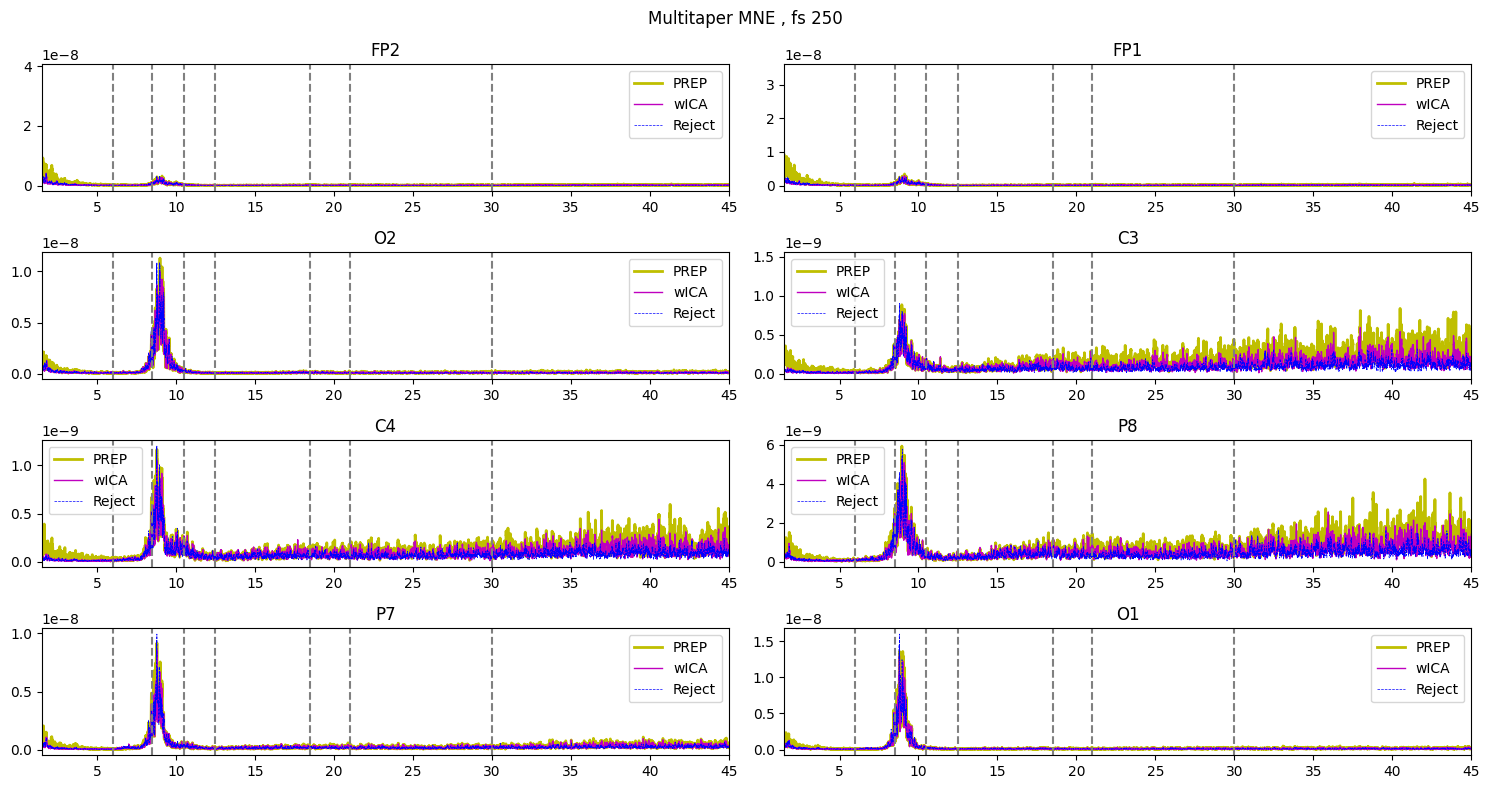

In [20]:
import seaborn as sns

num_channels = len(signal_reject.info['ch_names'])
num_rows = (num_channels + 1) // 2  # División entera redondeada hacia arriba

# Crea una figura con dos columnas de subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
x_line = [6, 8.5, 10.5, 12.5, 18.5, 21, 30]

# Ajusta los subplots
for i, ch in enumerate(signal_reject.info['ch_names']):
    row = i // 2  # Determina la fila del subplot
    col = i % 2   # Determina la columna del subplot
    axs[row, col].plot(freqs_rprep, psd_rprep[i, :], lw=2, label='PREP',color='y')
    axs[row, col].plot(freqs_rwica, psd_rwica[i, :], lw=1, label='wICA',color='m')
    axs[row, col].plot(freqs_rreject, psd_rreject[i, :], lw=0.5, label='Reject',color='b', linestyle='--')
    
    axs[row, col].set_xlim(1.5, 45)
    axs[row, col].legend()
    axs[row, col].set_title(ch)
    for x in x_line:
        axs[row, col].axvline(x=x, color='gray', linestyle='--')

# Ajusta el espaciado entre subplots
plt.suptitle('Multitaper MNE , fs 250')
plt.tight_layout()
plt.show()

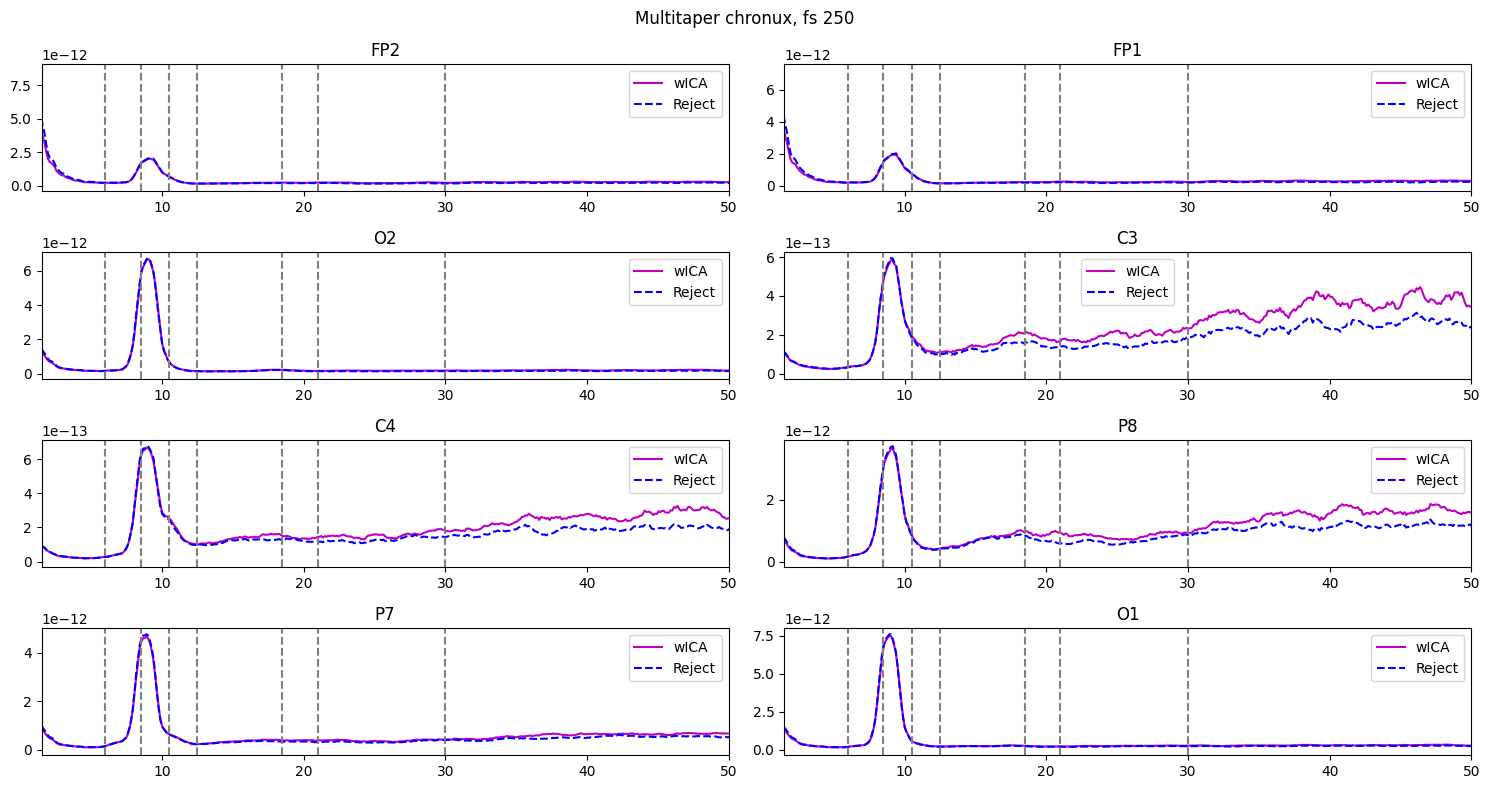

In [21]:

num_channels = len(signal_prep.info['ch_names'])
num_rows = (num_channels + 1) // 2  # División entera redondeada hacia arriba

# Crea una figura con dos columnas de subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
space_names = signal_prep.info['ch_names']

# Inicializa un contador para el índice de fila
row_index = 0

for space in space_names:
    rsreject = np.transpose(subsampled_epochs.get_data(), (1, 2, 0))
    
    space_idx = space_names.index(space)
    rss_prep, rffo_prep, power_normalized_prep = qeeg_psd_chronux(rep_prep[space_idx,:,:], prep_resampled.info['sfreq'], bands, spectro=True)
    rss_wica, rffo_wica, power_normalized_wica = qeeg_psd_chronux(rep_wica[space_idx,:,:], wica_resampled.info['sfreq'], bands, spectro=True)
    rss_reject, rffo_reject, power_normalized_reject = qeeg_psd_chronux(rsreject[space_idx,:,:], subsampled_epochs.info['sfreq'], bands, spectro=True) 

    # Determina la fila y columna del subplot
    row = row_index // 2  # Determina la fila del subplot
    col = row_index % 2   # Determina la columna del subplot
    
    #axs[row, col].plot(rffo_prep, rss_prep, label='Prep',color='y')
    axs[row, col].plot(rffo_wica, rss_wica, label='wICA',color='m')
    axs[row, col].plot(rffo_reject, rss_reject, label='Reject',color='b', linestyle='--')
    
    axs[row, col].set_xlim(1.5, 50)
    axs[row, col].legend()
    axs[row, col].set_title(space)  # Utiliza 'space' en lugar de 'ch' para el título
    
    # Incrementa el índice de fila
    row_index += 1
    for x in x_line:
        axs[row, col].axvline(x=x, color='gray', linestyle='--')


# Añade el título y ajusta el espaciado entre subplots
plt.suptitle('Multitaper chronux, fs 250')
plt.tight_layout()
plt.show()

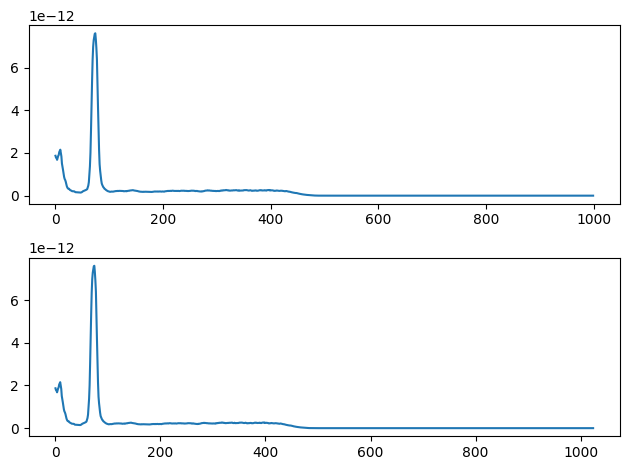

In [34]:


import matplotlib.pyplot as plt

# Crea la primera subtrama y traza la señal submuestreada
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primera subtrama
plt.plot(ss_reject[:1000]) # Trama la primera señal original

# Crea la segunda subtrama y traza la señal original
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segunda subtrama
plt.plot(rss_reject) # Trama la primera señal submuestreada

# Muestra las subtramas
plt.tight_layout()
plt.show()

In [23]:
print(psd_prep.shape)
print(psd_rprep.shape)

(8, 14949)
(8, 14949)


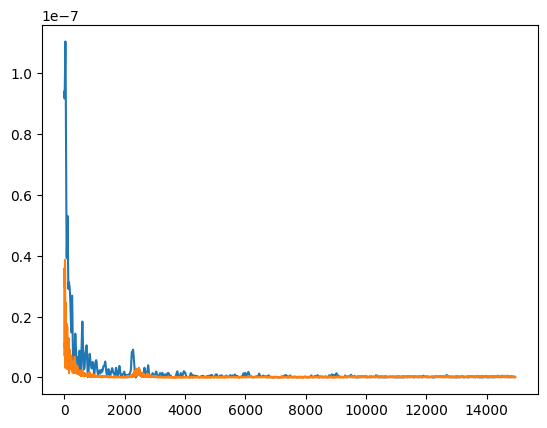

In [35]:
plt.plot(psd_prep[0,:])
plt.plot(psd_rprep[0,:])

# LDHARMONY

In [74]:
raw="F:\BIOMARCADORES\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_eeg.vhdr"
path_wavelet = "F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-wavelet_eeg.fif"
path_wica = "F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-wica_eeg.fif"
path_reject = "F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-reject_eeg.fif"
path_DM = "F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-Muscle_eeg.fif"

In [75]:
signal_uploaded=raw=mne.io.read_raw(raw)
electrodes = ['FP1','FP2','C3','C4','P7','P8','O1','O2']
signal_uploaded.pick_channels(ch_names=electrodes)
signal_uploaded.resample(250, npad='auto', verbose='error') # To not get out of memory on RANSAC
signal_uploaded

Extracting parameters from F:\BIOMARCADORES\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_eeg.vhdr...
Setting channel info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawBrainVision | sub-CTR011_ses-V0_task-CE_eeg.eeg, 8 x 76350 (305.4 s), ~4.7 MB, data loaded>

In [76]:
from sovaflow.flow import organize_channels,standardize,set_montage
correct_montage=electrodes
montage_kind='standard_1005'
fun_names_map=standardize


signal_wavelet = mne.io.read_raw(path_wavelet)
signal_wica = mne.io.read_raw(path_wica)
signal_reject=mne.io.read_raw(path_reject)
signal_DM = mne.io.read_raw(path_DM)

print(signal_wavelet.info.ch_names)
print(signal_wica.info.ch_names)
print(signal_reject.info.ch_names)
print(signal_DM.info.ch_names)

signal_uploaded,correct_montage= organize_channels(signal_uploaded,correct_montage,fun_names_map)
signal_uploaded,montage = set_montage(signal_uploaded,montage_kind)

signal_wavelet,correct_montage= organize_channels(signal_wavelet,correct_montage,fun_names_map)
signal_wavelet,montage = set_montage(signal_wavelet,montage_kind)

signal_reject,correct_montage= organize_channels(signal_reject,correct_montage,fun_names_map)
signal_reject,montage = set_montage(signal_reject,montage_kind)

signal_wica,correct_montage= organize_channels(signal_wica,correct_montage,fun_names_map)
signal_wica,montage = set_montage(signal_wica,montage_kind)

signal_DM,correct_montage= organize_channels(signal_DM,correct_montage,fun_names_map)
signal_DM,montage = set_montage(signal_DM,montage_kind)

print(signal_uploaded.info.ch_names)
print(signal_wavelet.info.ch_names)
print(signal_wica.info.ch_names)
print(signal_reject.info.ch_names)
print(signal_DM.info.ch_names)


Opening raw data file F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-wavelet_eeg.fif...
Isotrak not found
    Range : 0 ... 76249 =      0.000 ...   304.996 secs
Ready.
Opening raw data file F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-wica_eeg.fif...
Isotrak not found
    Range : 0 ... 76249 =      0.000 ...   304.996 secs
Ready.
Opening raw data file F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-reject_eeg.fif...
Isotrak not found
    Range : 0 ... 63749 =      0.000 ...   254.996 secs
Ready.
Opening raw data file F:\BIOMARCADORES\derivatives\ldharmony\sub-CTR011\ses-V0\eeg\sub-CTR011_ses-V0_task-CE_desc-Muscle_eeg.fif...
    Range : 0 ... 63749 =      0.000 ...   254.996 secs
Ready.
['C4', 'FP2', 'O1', 'P8', 'P7', 'C3', 'O2', 'FP1']
['C4', 'FP2', 'O1', 'P8', 'P7', 'C3', 'O2', 'FP1']
['C4', 'FP2', 'O1', 'P8', 'P7', 'C3', 'O2', 'FP1']
['C4', 'FP2', 

In [86]:
signal_uploaded.info.ch_names

['FP1', 'O2', 'O1', 'P8', 'C3', 'P7', 'FP2', 'C4']

FP1
O2
O1
P8
C3
P7
FP2
C4


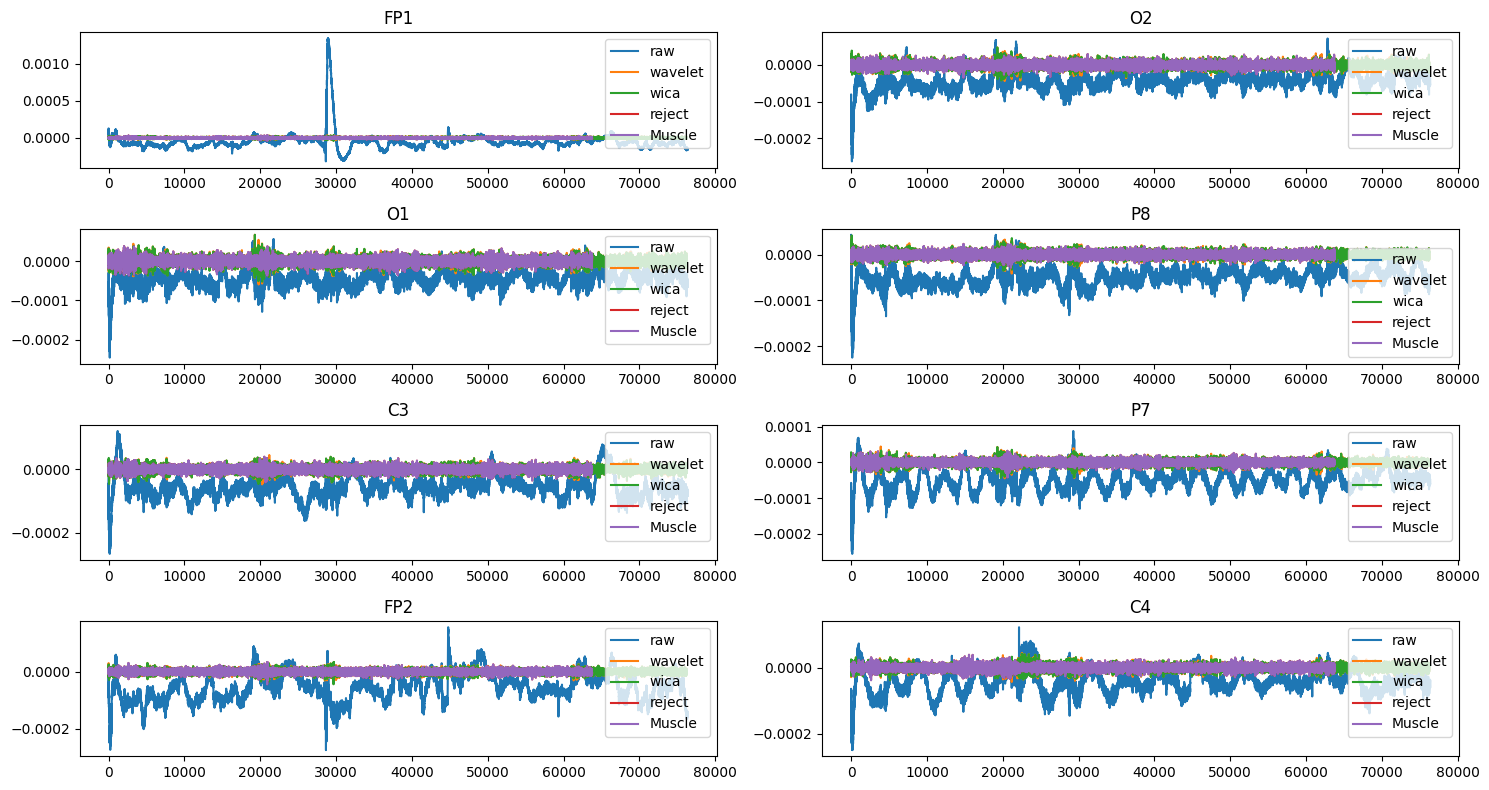

In [88]:
num_rows=4
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
row_index=0
for i,ch in enumerate(signal_uploaded.info.ch_names):
    print(ch)
    row = row_index // 2  # Determina la fila del subplot
    col = row_index % 2
    axs[row,col].plot(signal_uploaded.get_data()[i,:],label='raw')
    axs[row,col].plot(signal_wavelet.get_data()[i,:],label='wavelet')
    axs[row,col].plot(signal_wica.get_data()[i,:],label='wica')
    axs[row,col].plot(signal_reject.get_data()[i,:],label='reject')
    axs[row,col].plot(signal_DM.get_data()[i,:],label='Muscle')
    axs[row, col].legend()
    row_index += 1
    axs[row, col].set_title(ch) 
plt.tight_layout()
plt.show()

In [80]:
from sovachronux.qeeg_psd_chronux import qeeg_psd_chronux
def periodogram(signal_filtered,sampling_frecuency,bands,epoch_length=2,all=False):

      '''
      Funtion to obtain the periodogram of each logmar for each signal using Multitaper
      technique.

      Inputs: signal_filtered --> Numpy array (signal to be used to find the periodogram)
            sampling_frecuency --> int (sampling frecuency of the EEG recorder)
            Bands -- > Frequency bands 
            Bands -- > Frequency bands 
            signal_path --> str (path where the plots will be saved)
      '''

      
      sources_epoch,_ = format_data(signal_filtered,sampling_frecuency,epoch_length)
      num_canales = sources_epoch.shape[0]
      
      c_pot={}
      c_spect=[]
      c_frq=[]
      c_frq=[]
      for ch in range(num_canales):
            
            #f, Pxx = signal.welch(signal_filtered[:,ch], fs, nperseg=fs*2, nfft=None, return_onesided=True)
            #s=signal_filtered[ch,:].reshape(-1, 1)
            ss, ffo,pot = qeeg_psd_chronux(sources_epoch[ch,:,:], sampling_frecuency,bands,normalized=True,spectro=True)
            c_pot[f'C{ch + 1}']=pot #esto devuelve un diccionario con las potencias en cada canal
            c_spect.append(ss) #Espectros
            c_frq.append(ffo) #frecuncias

      if all:
         return c_pot,c_spect,c_frq
      else:
         
        return c_pot
    

In [81]:
from sovachronux.qeeg_psd_chronux import qeeg_psd_chronux

bands ={'Delta':(4,6),
        'Theta':(6,8.5),
        'Alpha-1':(8.5,10.5),
        'Alpha-2':(10.5,12.5),
        'Beta1':(12.5,18.5),
        'Beta2':(18.5,21),
        'Beta3':(21,30),
        'Gamma':(30,45)
        }
x_line=[6,8.5,10.5,12.5,18.5,21,30,45]

pot,ss,ffo=periodogram(signal_uploaded.get_data(), signal_uploaded.info['sfreq'], bands,all=True)
pot_wav,ss_wav,ffo_wav=periodogram(signal_wavelet.get_data(), signal_wavelet.info['sfreq'], bands,all=True)
pot_wica,ss_wica,ffo_wica=periodogram(signal_wica.get_data(), signal_wica.info['sfreq'], bands,all=True)
pot_reject,ss_reject,ffo_reject=periodogram(signal_reject.get_data(), signal_reject.info['sfreq'], bands,all=True)
pot_dm,ss_dm,ffo_dm=periodogram(signal_DM.get_data(), signal_DM.info['sfreq'], bands,all=True)

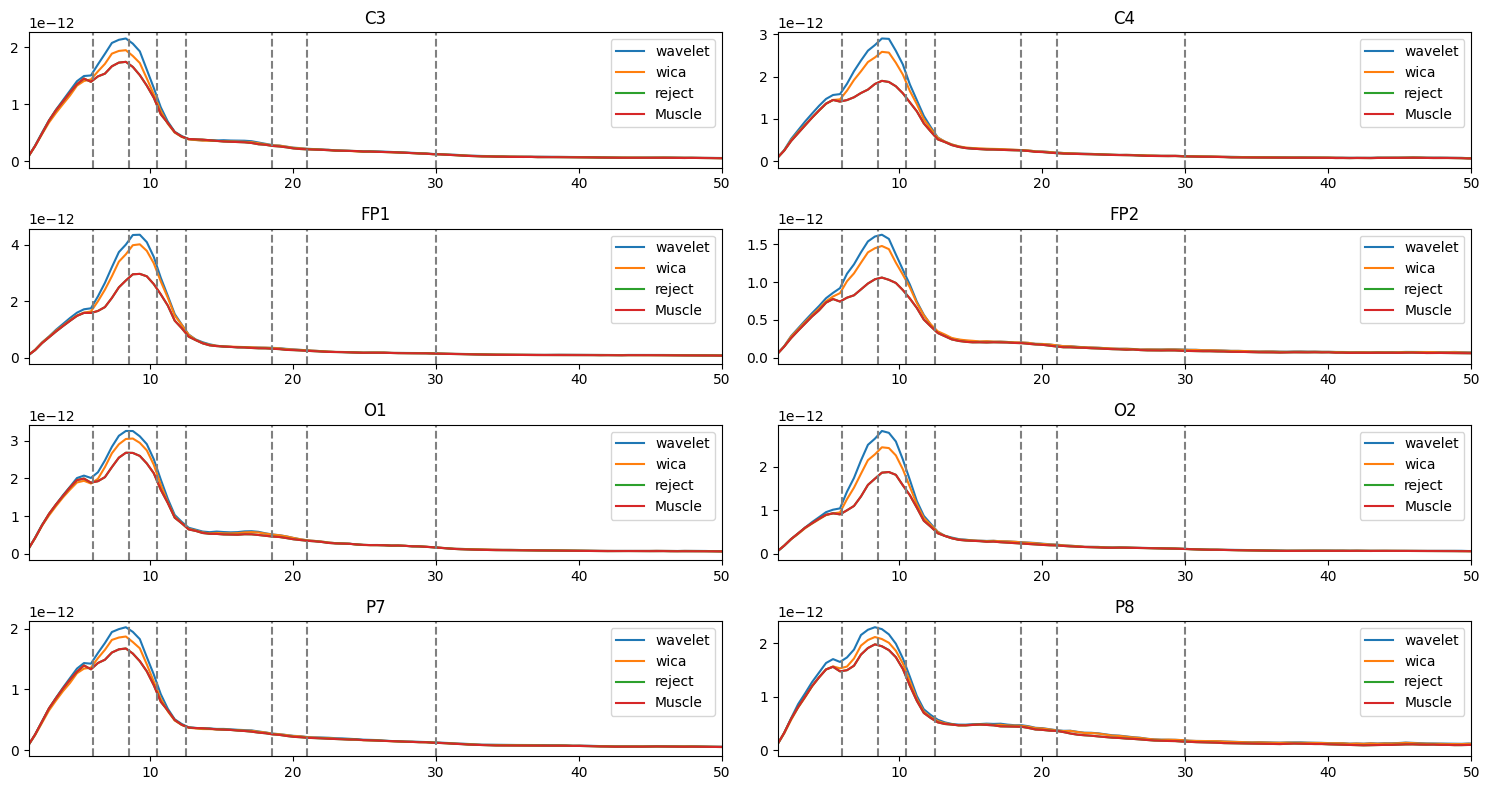

done


In [85]:
num_rows=4
fig1, axs1 = plt.subplots(num_rows, 2, figsize=(15, 2*num_rows))
row_index=0
x_line = [6, 8.5, 10.5, 12.5, 18.5, 21, 30]
for i,ch in enumerate(sorted(signal_uploaded.info.ch_names)):
    row = row_index // 2  # Determina la fila del subplot
    col = row_index % 2
    #axs1[row,col].plot(ffo[i],ss[i],label='raw')
    axs1[row,col].plot(ffo_wav[i],ss_wav[i],label='wavelet')
    axs1[row,col].plot(ffo_wica[i],ss_wica[i],label='wica')
    axs1[row,col].plot(ffo_reject[i],ss_reject[i],label='reject')
    axs1[row,col].plot(ffo_dm[i],ss_dm[i],label='Muscle')
    axs1[row, col].legend()
    row_index += 1
    axs1[row, col].set_title(ch)
    axs1[row, col].set_xlim(1.5, 50)
    for x in x_line:
        axs1[row, col].axvline(x=x, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
print('done')